<a href="https://colab.research.google.com/github/konks/meta/blob/main/Conv3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torchsummary import summary
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
class MyNet(nn.Module):
  def __init__(self):
    super(MyNet, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
    self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
    self.meta = nn.Conv3d(1, 2, (3, 3, 3), padding=1)
    self.pool2 = nn.MaxPool3d((1, 2, 2), stride=(1, 2, 2))
    self.fc1 = nn.Linear(8192, 40)
    self.fc2 = nn.Linear(40, 10)


  def forward(self, x):
    x = F.mish(self.conv1(x))
    x = F.mish(self.conv2(x))
    x = self.pool1(F.mish(self.conv3(x)))
    x = F.mish(self.conv4(x))
    x = x.unsqueeze(1)
    x = self.pool2(F.mish(self.meta(x)))
    x = torch.flatten(x, 1) #поменять все размерности, кроме батча
    x = F.mish(self.fc1(x))
    x = self.fc2(x)
    return x

In [ ]:
from tqdm import tqdm_notebook
import torch.optim as optim

net = MyNet().to(device)

loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-3
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
losses = []

In [ ]:
summary(net, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
            Conv2d-2           [-1, 32, 32, 32]           4,640
            Conv2d-3           [-1, 32, 32, 32]           9,248
         MaxPool2d-4           [-1, 32, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]          18,496
            Conv3d-6        [-1, 2, 64, 16, 16]              56
         MaxPool3d-7          [-1, 2, 64, 8, 8]               0
            Linear-8                   [-1, 40]         327,720
            Linear-9                   [-1, 10]             410
Total params: 361,018
Trainable params: 361,018
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 1.13
Params size (MB): 1.38
Estimated Total Size (MB): 2.51
-------------------------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/391 [00:00<?, ?it/s]

[1,    50] loss: 2.113
[1,   100] loss: 1.831
[1,   150] loss: 1.609
[1,   200] loss: 1.458
[1,   250] loss: 1.372
[1,   300] loss: 1.310
[1,   350] loss: 1.255


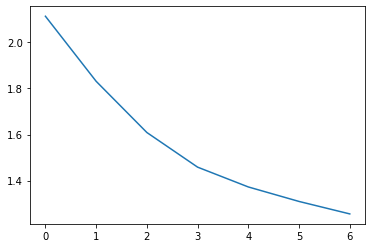

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/391 [00:00<?, ?it/s]

[2,    50] loss: 1.092
[2,   100] loss: 1.077
[2,   150] loss: 1.033
[2,   200] loss: 1.034
[2,   250] loss: 0.987
[2,   300] loss: 0.968
[2,   350] loss: 0.955


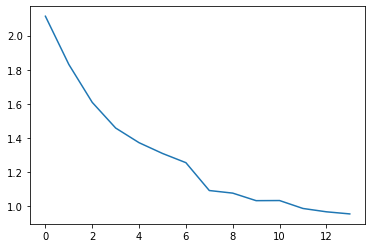

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/391 [00:00<?, ?it/s]

[3,    50] loss: 0.782
[3,   100] loss: 0.774
[3,   150] loss: 0.799
[3,   200] loss: 0.799
[3,   250] loss: 0.783
[3,   300] loss: 0.796
[3,   350] loss: 0.791


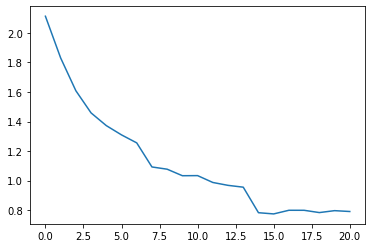

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/391 [00:00<?, ?it/s]

[4,    50] loss: 0.594
[4,   100] loss: 0.574
[4,   150] loss: 0.606
[4,   200] loss: 0.621
[4,   250] loss: 0.639
[4,   300] loss: 0.634
[4,   350] loss: 0.629


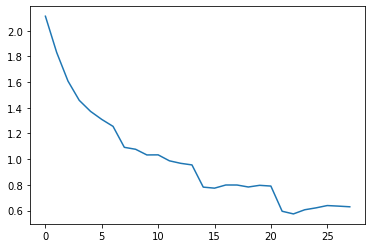

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/391 [00:00<?, ?it/s]

[5,    50] loss: 0.443
[5,   100] loss: 0.439
[5,   150] loss: 0.447
[5,   200] loss: 0.460
[5,   250] loss: 0.457
[5,   300] loss: 0.464
[5,   350] loss: 0.481


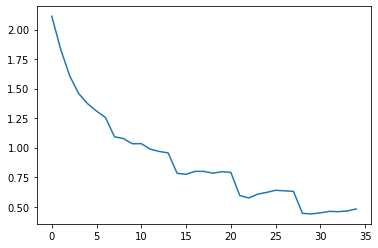

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/391 [00:00<?, ?it/s]

[6,    50] loss: 0.292
[6,   100] loss: 0.307
[6,   150] loss: 0.297
[6,   200] loss: 0.312
[6,   250] loss: 0.324
[6,   300] loss: 0.353
[6,   350] loss: 0.349


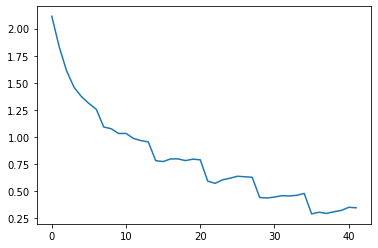

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/391 [00:00<?, ?it/s]

[7,    50] loss: 0.199
[7,   100] loss: 0.186
[7,   150] loss: 0.202
[7,   200] loss: 0.216
[7,   250] loss: 0.244
[7,   300] loss: 0.244
[7,   350] loss: 0.273


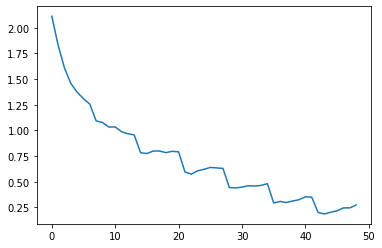

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/391 [00:00<?, ?it/s]

[8,    50] loss: 0.126
[8,   100] loss: 0.134
[8,   150] loss: 0.140
[8,   200] loss: 0.158
[8,   250] loss: 0.163
[8,   300] loss: 0.159
[8,   350] loss: 0.181


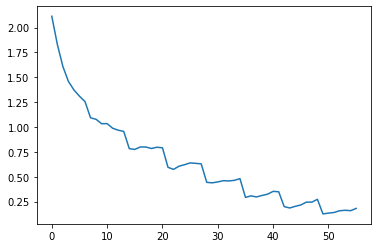

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/391 [00:00<?, ?it/s]

[9,    50] loss: 0.109
[9,   100] loss: 0.094
[9,   150] loss: 0.094
[9,   200] loss: 0.107
[9,   250] loss: 0.113
[9,   300] loss: 0.128
[9,   350] loss: 0.136


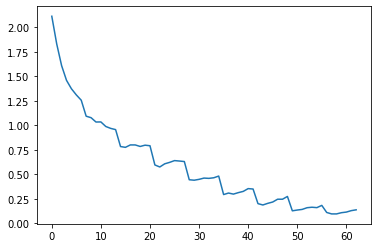

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/391 [00:00<?, ?it/s]

[10,    50] loss: 0.070
[10,   100] loss: 0.057
[10,   150] loss: 0.071
[10,   200] loss: 0.076
[10,   250] loss: 0.081
[10,   300] loss: 0.093
[10,   350] loss: 0.110


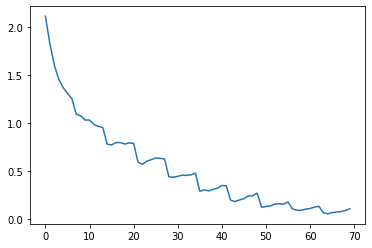

Обучение завершено


In [ ]:
for epoch in tqdm_notebook(range(10)):

  running_loss = 0.0
  for i, batch in enumerate(tqdm_notebook(trainloader)): #занумеровали batch (кортеж из 4 изображений и 4 ответов)
    
    X_batch, y_batch = batch

    optimizer.zero_grad()

    y_pred = net(X_batch.to(device))
    loss = loss_fn(y_pred, y_batch.to(device)) #одномерный тензор, в котором лежит значение функции потерь
    loss.backward() #считает производные по каждому обучаемому параметру
    optimizer.step() #изменились веса

    running_loss += loss.item()

    if i % 50 == 49:
      print('[%d, %5d] loss: %.3f' %
            (epoch + 1, i + 1, running_loss /50))
      losses.append(running_loss / 50) #массив из значений функции потерь
      running_loss = 0.0

  plt.plot(np.arange(len(losses)), losses)
  plt.show()

print('Обучение завершено') 

In [ ]:
acc = 0.0

with torch.no_grad(): #это сократит использование памяти и ускорит вычисления
  for data in testloader:
    images, labels = data
    y_pred = net(images.to(device)) #двумерный тензор с вектором изображений и "вероятностей"
    y_pred = torch.argmax(y_pred, axis=1) #превратили вектор вероятности в лейбл
    answer = torch.sum(y_pred.cpu() == labels)
    acc += answer.item() / len(testloader.dataset)

print(acc * 100, '%', sep='')

67.57999999999998%
